In [ ]:
# ..... find markers for each cluster? ..... #

In [2]:
library(Seurat)
library(dplyr)

In [3]:
om2 = read.delim('~/septation/ProtT5/reciprocal_hits/human_to_lizard.reciprocal_closest_hits.csv', sep = ',')
dim(om2)
om2[1:2,]

[1] 12156     3

lizard human distance
1 A1CF   A1CF  2.812206
2 A4GNT  A4GNT 8.551679

In [4]:
# load list of orthologs
om = read.delim('lizard_human_orthologs_eggNOG.txt', sep = '\t')
om <- om[!is.na(om$lizard_gene) & !is.na(om$ortholog_name),]
dim(om)
om[1,]

[1] 27011     7

query          orth_type species            orthologs       lizard_gene
1 XP_060608688.1 one2one   Homo sapiens(9606) ENSP00000340297 ARHGEF10   
  ortholog_gene   ortholog_name
1 ENSG00000104728 ARHGEF10

In [5]:
# gene lists
m1 = read.delim('~/septation/markers/Bayraktar_marker_genes.txt', sep = '\t')
m1[1:2,]

ctypes = m1$Cluster
top_markers = c()

for(ii in 1:length(ctypes)){
    temp = data.frame(compartment = m1$Compartment[ii], 
                      subtype = m1$Subtype[ii], cluster = m1$Cluster[ii],
                      gene = unique(unlist(stringr::str_split(m1$Gene[ii], ','))))
    top_markers = rbind(top_markers, temp)
}
top_markers[1:3,]

Compartment    Subtype              Cluster                  
1 Cardiomyocytes AtrialCardiomyocytes AtrialCardiomyocytesLeft 
2 Cardiomyocytes AtrialCardiomyocytes AtrialCardiomyocytesRight
  Gene                                                                                                
1 TNNT2,ACTN2,LDB3,CSRP3,SMPX,KCNMB2,PCDH7,RYR3,PANCR,MBP,NAV3,PITX2,NPTN,NPPA,MYL7,MYL4,MYH6,PPKAG2  
2 TNNT2,ACTN2,LDB3,CSRP3,SMPX,NTM,ROR1,KIF26B,PLC1,ANGPT1,BRINP3,BMP10,NPTN,NPPA,MYL7,MYL4,MYH6,PPKAG2
  Comments                                                
1 Genes NPPA,MYL7,MYL4,MYH6,PPKAG2 are from Kanemaru et al
2 Genes NPPA,MYL7,MYL4,MYH6,PPKAG2 are from Kanemaru et al

compartment    subtype              cluster                  gene 
1 Cardiomyocytes AtrialCardiomyocytes AtrialCardiomyocytesLeft TNNT2
2 Cardiomyocytes AtrialCardiomyocytes AtrialCardiomyocytesLeft ACTN2
3 Cardiomyocytes AtrialCardiomyocytes AtrialCardiomyocytesLeft LDB3

In [6]:
papers = c('Asp', 'Feng', 'Hill', 'Knight-Schrijver', 'Mantri', 'Qiu', 
           'Farah', 'Kanemaru', 'Xu', 'Cui')

cols1 = c('predicted', 'predicted', 'predicted', 'class', 'predicted', 'class',
          'predicted', 'class', 'predicted', 'predicted')

In [7]:
# get list of samples
stages = rep(c('stage9', 'stage13', 'stage16'), each = 3)
samples = paste0('sample', rep(1:3, 3))

In [163]:
# load data
id = 8
file0 = paste0(stages[id], '_', samples[id], '_data.rds')
paste0(stages[id], '_', samples[id])

sce = readRDS(file0)
sce

[1] "stage16_sample2"

An object of class Seurat 
22732 features across 11246 samples within 1 assay 
Active assay: RNA (22732 features, 2000 variable features)
 3 layers present: counts, data, scale.data
 2 dimensional reductions calculated: pca, umap

In [164]:
files0 = list.files('annotations/')
files1 = files0[grep(paste0(stages[id], '_', samples[id]), files0)]
files1

[1] "stage16_sample2_Asp_celltypes.csv"               
 [2] "stage16_sample2_Cui_celltypes.csv"               
 [3] "stage16_sample2_Farah_celltypes.csv"             
 [4] "stage16_sample2_Feng_celltypes.csv"              
 [5] "stage16_sample2_Hill_celltypes.csv"              
 [6] "stage16_sample2_Kanemaru_celltypes.csv"          
 [7] "stage16_sample2_Knight-Schrijver_celltypes.csv"  
 [8] "stage16_sample2_Mantri_celltypes.csv"            
 [9] "stage16_sample2_Mantri_Seurat_label_transfer.csv"
[10] "stage16_sample2_Qiu_celltypes.csv"               
[11] "stage16_sample2_Xu_celltypes.csv"

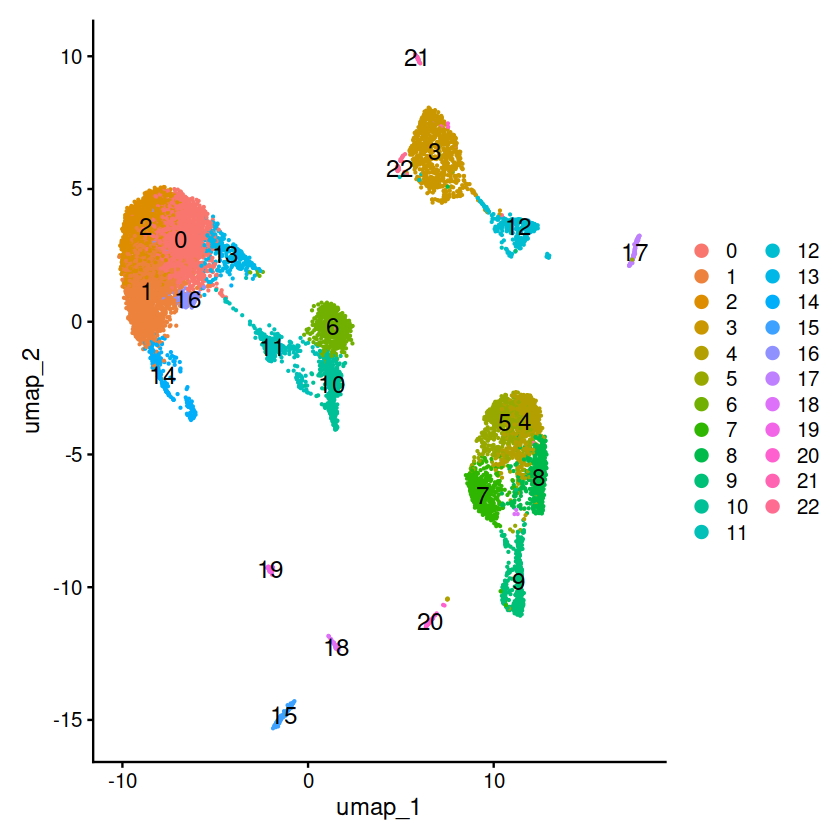

In [165]:
DimPlot(sce, reduction = 'umap', label = T, label.size = 5)
Idents(sce) <- "seurat_clusters"

In [170]:
# top markers
markers <- FindMarkers(object = sce, ident.1 = 22, only.pos = T)
markers$gene = om$ortholog_name[match(rownames(markers), om$lizard_gene)]
# markers$gene = om2$human[match(rownames(markers), om2$lizard)]

markers <- markers[!is.na(markers$gene),]
head(markers)
markers$gene[1:50]

p_val         avg_log2FC pct.1 pct.2 p_val_adj     gene   
CENPI        1.123591e-125 5.059500   0.679 0.020 2.554147e-121 CENPI  
GEN1         6.125768e-109 4.866421   0.571 0.016 1.392510e-104 GEN1   
LOC132772660 1.893766e-108 6.695064   0.214 0.002 4.304909e-104 FAM111B
BUB1         3.039512e-100 4.707287   0.607 0.020  6.909418e-96 BUB1   
ANLN          1.779573e-98 4.095393   0.929 0.049  4.045325e-94 ANLN   
FAM72A        2.309321e-95 4.965208   0.429 0.010  5.249548e-91 FAM72A

[1] "CENPI"   "GEN1"    "FAM111B" "BUB1"    "ANLN"    "FAM72A"  "KCNJ1"  
 [8] "CEP55"   "KIF11"   "KNTC1"   "KIF18A"  "SMC2"    "DIAPH3"  "G2E3"   
[15] "NUSAP1"  "CENPF"   "MKI67"   "KIF20A"  "KIF20B"  "CENPE"   "CGAS"   
[22] "CTRC"    "ADGRL4"  "PLK1"    "NCAPG"   "RACGAP1" "NCAPD2"  "CIT"    
[29] "BUB1B"   "KIF2C"   "KIF18B"  "GPR132"  "ECT2"    "CCDC110" "TACC3"  
[36] "KIF15"   "CENPX"   "NEMP2"   "SALL1"   "EYA1"    "CENPC"   "KLHL4"  
[43] "CDCA2"   "AURKA"   "CDK1"    "ESCO2"   "PTH1R"   "KIF25"   "MMRN2"  
[50] "OIP5"

In [171]:
options(warn = -1)

ctypes = unique(top_markers$cluster)
df2 = data.frame(celltype = ctypes, num_markers = NA, avg_rank = NA,
                min_rank = NA, best_gene = NA, genes = NA)

for(ii in 1:length(ctypes)){
    gset = unlist(top_markers$gene[top_markers$cluster==ctypes[ii]])
    vec2 = match(gset, markers$gene)
    df2$num_markers[ii] = sum(!is.na(vec2))
    df2$avg_rank[ii] = round(mean(vec2, na.rm = T))
    df2$min_rank[ii] = min(vec2, na.rm = T)
    df2$best_gene[ii] = markers$gene[df2$min_rank[ii]]
    df2$genes[ii] = paste(markers$gene[sort(vec2[!is.na(vec2)])], collapse = ', ')
}

# df2 %>% filter(grepl('Fibroblasts|Pericytes|SmoothMuscleCells|Pericardial|Epicardial', celltype)) %>% arrange(-(num_markers)) %>% head(., 15)
df2 %>% filter(grepl('Endocardial|EndothelialCells', celltype)) %>% arrange(-(num_markers)) %>% head(., 15)
# df2 %>% arrange(-(num_markers)) %>% head(., 15)

celltype                            num_markers avg_rank min_rank best_gene
1 EndocardialCushionCells             13          1922     68       TIE1     
2 GreatVesselVenousEndothelialCells   11          1896     68       TIE1     
3 GreatVesselArterialEndothelialCells 10          1738     68       TIE1     
4 ValveEndothelialCells               10          1788     68       TIE1     
5 CoronaryArterialEndothelialCells     9           923     23       ADGRL4   
6 CoronaryVenousEndothelialCells       8           828     23       ADGRL4   
7 CoronaryCapillaryEndothelialCells    8           566     23       ADGRL4   
8 EndocardialCells                     8           829     68       TIE1     
9 LymphaticEndothelialCells            8          2395     51       PECAM1   
  genes                                                                                     
1 TIE1, EMCN, CDH5, CNR1, NFATC1, GJA4, TSPAN8, ECSCR, POSTN, COL26A1, PROX1, BMP4, TMEM132D
2 TIE1, EMCN, CDH5, HSPG2, PTPRB, MEIS2, PLXNA4, ECSCR, FBN1, HMCN1, COLEC12                
3 TIE1, CDH5, HSPG2, FN1, PTPRB, MEIS2, PLXNA4, ECSCR, HMCN1, COLEC12                       
4 TIE1, EMCN, CDH5, NFATC1, PTPRB, SULF1, ECSCR, KLF2, GJA1, LTC4S                          
5 ADGRL4, TIE1, CDH5, HSPG2, FN1, PTPRB, AGRN, ECSCR, FBN1                                  
6 ADGRL4, TIE1, EMCN, CDH5, HSPG2, PTPRB, ECSCR, FBN1                                       
7 ADGRL4, TIE1, EMCN, CDH5, HSPG2, PTPRB, AGRN, ECSCR                                       
8 TIE1, EMCN, CDH5, ADGRG6, NPR3, SMOC1, ECSCR, POSTN                                       
9 PECAM1, TIE1, CDH5, PARD6G, ECSCR, PROX1, DOCK5, MPP7

In [172]:
# NPPA, MYL4 in atria, BMP10, IRX4 in ventricles, ACTC1 and GJA5 in both - Mantri et al
paste0('BMP10   ', which(rownames(markers)=='BMP10'))
paste0('IRX4   ', which(rownames(markers)=='IRX4'))
paste0('TBX5   ', which(rownames(markers)=='TBX5'))
paste0('MYL4   ', which(rownames(markers)=='MYL4'))
paste0('MYOZ2   ', which(rownames(markers)=='MYOZ2'))

[1] "BMP10   2012"

[1] "IRX4   "

[1] "TBX5   "

[1] "MYL4   "

[1] "MYOZ2   "

In [173]:
# CDH5 for endo, DCN, COL6A3 for mesenchymal, TCF21 in fibro, ACTA2 for mural, BNC1 for epicardial
paste0('COL6A3   ', which(rownames(markers)=='COL6A3'))
paste0('DCN   ', which(rownames(markers)=='DCN'))
paste0('TCF21   ', which(rownames(markers)=='TCF21'))
paste0('ACTA2   ', which(rownames(markers)=='ACTA2'))
paste0('CDH5   ', which(rownames(markers)=='CDH5'))
paste0('BNC1   ', which(rownames(markers)=='BNC1'))

[1] "COL6A3   "

[1] "DCN   6864"

[1] "TCF21   "

[1] "ACTA2   "

[1] "CDH5   78"

[1] "BNC1   "

In [174]:
match(c('PTPRC', 'RUNX1'), rownames(markers))  # all

match(c('CD163', 'CD14', 'C1QA', 'FCN1', 'TIMD4', 'CX3CR1', 'LYVE1', 'C3', 'IL18',
       'CLNK', 'LAMP3', 'ENOX1', 'RUNX2', 'CUX2', 'CPA3'), rownames(markers))  # myeloid
match(c('ITGA2B', 'GATA1'), rownames(markers))  # megakaryocyte
match(c('CD3E', 'IL7R', 'CD40LG', 'BCL11B', 'CD6', 'CD8A', 'CD8B', 'THEMS',
       'MME', 'VPREB1', 'PCDH9', 'MS4A1', 'KLRK1', 'TOX2', 'RORC'), rownames(markers))  # lymhpoid
match(c('GATA2', 'KIT', 'CPA3'), rownames(markers))  # mast

[1] NA NA

[1]   NA   NA   NA   NA   NA   NA   NA   NA   NA   NA 4426   NA 1356  762   NA

[1] NA NA

[1]   NA   NA   NA 5802   NA 6466   NA   NA   NA   NA   NA   NA   NA 1793   NA

[1] 1848 3478   NA

In [175]:
# neural crest cells --- shows up with fibroblasts (due to BNC1, BNC2)
match(c('PHOX2B', 'SOX10', 'HCN4', 'TBX3', 'TBX18', 'TH', 'TFAP2A',
       'PAX3', 'PAX7', 'BMP4', 'BMP7', 'SEMA3C', 'NPN1', 'FOXD3',
       'SNAI1', 'SOX9', 'NRXN1', 'TFAP2B'), rownames(markers))  # all

match(c('PHOX2A', 'PCSK1N', 'SYT1', 'ASLC1', 'BNC2'), rownames(markers))  # neurons + precursors
match(c('GATA3', 'ISL1', 'RTN1', 'DBH', 'VSTM2L', 'SV2C', 'SLC5A7'), rownames(markers))  # sym + para neurons
match(c('DLK1', 'EPAS1', 'KCNJ6'), rownames(markers))  # chromaffin

match(c('PTPRZ1', 'CDH19', 'ERBB3', 'SLITRK6', 'IL1RAPL2', 'COL20A1',
      'LAMB1', 'COL14A1', 'TGFBR3'), rownames(markers))  # glia

[1] 2544   NA   NA   NA   NA   NA   NA   NA 5120 4560   NA 4722   NA   NA   NA
[16]   NA 5032  306

[1]   NA   NA 6522   NA 4145

[1]   NA 2677 5262   NA 5946 4234   NA

[1]  198 2803   NA

[1]   NA   NA   NA   NA 1811   NA  219   NA  379

In [58]:
# get df of classifications and annos
df = c()

for(ii in 1:length(papers)){
    temp = read.delim(paste0('annotations/', stages[id], '_', samples[id], '_', papers[ii], '_celltypes.csv'), sep = ',')
    temp$study = papers[ii]
    temp$cluster = sce$seurat_clusters
    temp$anno = temp[,match(cols1[ii], colnames(temp))]
    df = rbind(df, temp[,c('study', 'cluster', 'anno')])
}

df$ctype = paste0(df$study, '_', df$anno)
head(df)

study cluster anno                 
stage9_sample3_AAACCCAAGTAGCTCT-1 Asp   1       Erythrocytes         
stage9_sample3_AAACCCACAAGACGAC-1 Asp   7       Erythrocytes         
stage9_sample3_AAACCCACACACCAGC-1 Asp   8       aCM                  
stage9_sample3_AAACCCAGTAAGGAGA-1 Asp   15      Fibroblast connective
stage9_sample3_AAACCCAGTAGAATAC-1 Asp   7       unassigned           
stage9_sample3_AAACCCAGTATACCTG-1 Asp   14      SMCs                 
                                  ctype                    
stage9_sample3_AAACCCAAGTAGCTCT-1 Asp_Erythrocytes         
stage9_sample3_AAACCCACAAGACGAC-1 Asp_Erythrocytes         
stage9_sample3_AAACCCACACACCAGC-1 Asp_aCM                  
stage9_sample3_AAACCCAGTAAGGAGA-1 Asp_Fibroblast connective
stage9_sample3_AAACCCAGTAGAATAC-1 Asp_unassigned           
stage9_sample3_AAACCCAGTATACCTG-1 Asp_SMCs

In [59]:
table(sce$seurat_clusters)


   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
1251 1083  751  690  661  632  626  581  571  567  562  436  417  381  339  204 
  16   17   18   19   20   21 
 200  157   78   58   44   23 

In [60]:
df %>% filter(cluster == 14) %>%
group_by(ctype) %>% reframe(count = n()) %>% arrange(-count) 

ctype                                    count
1  Cui_C3 (Fibroblast-like cell)            322  
2  Feng_fibroblast-like                     317  
3  Qiu_Mesoderm                             311  
4  Farah_Fibro                              293  
5  Kanemaru_fibroblast                      207  
6  Xu_fibroblast-1                          201  
7  Mantri_Fibroblast cells                  191  
8  Knight-Schrijver_Smooth_Muscle_Cells     143  
9  Asp_Fibroblast smaller vascular          134  
10 Hill_Mes                                 132  
11 Knight-Schrijver_Fibroblasts             107  
12 Mantri_Epi-epithelial cells              104  
13 Hill_CP3                                  97  
14 Asp_SMCs                                  74  
15 Asp_Fibroblast connective                 65  
16 Knight-Schrijver_Endothelial_Other        65  
17 Kanemaru_neural cell                      58  
18 Xu_fibroblast-8                           48  
19 Hill_EPiC                                 46  
20 Asp_Epicardium-derived cell               32  
21 Kanemaru_regular atrial cardiac myocyte   27  
22 Qiu_Cardiomyocytes                        27  
23 Mantri_Valve cells                        26  
24 Hill_CP2                                  24  
25 Asp_aCM                                   19  
26 Kanemaru_lymphocyte                       19  
27 Hill_CP1                                  18  
28 Knight-Schrijver_Cardiomyocytes           16  
29 Xu_atrioventricular canal                 16  
30 Cui_C2 (CM)                               15  
⋮  ⋮                                        ⋮    
52 Xu_fibroblast-2                          5    
53 Hill_CM-AVC                              4    
54 Kanemaru_endothelial cell                4    
55 Farah_BEC                                3    
56 Farah_LEC                                3    
57 Hill_CM-LSV                              3    
58 Knight-Schrijver_Epicardium_Meso         3    
59 Knight-Schrijver_Pericytes               3    
60 Xu_Schwann progenitor-3                  3    
61 Xu_fibroblast-10                         3    
62 Xu_fibroblast-4                          3    
63 Xu_fibroblast-6                          3    
64 Xu_splanchnic LPM like                   3    
65 Cui_C4 (EC)                              2    
66 Farah_Neuronal                           2    
67 Feng_blood                               2    
68 Hill_CM-RA                               2    
69 Kanemaru_mesothelial cell                2    
70 Asp_Epicardial cells                     1    
71 Asp_Erythrocytes                         1    
72 Farah_Endocardial                        1    
73 Farah_unassigned                         1    
74 Feng_endocardial_ec                      1    
75 Kanemaru_mural cell                      1    
76 Kanemaru_unassigned                      1    
77 Knight-Schrijver_Endocardial             1    
78 Knight-Schrijver_Immature_Cardiomyocytes 1    
79 Mantri_Mural cells                       1    
80 Qiu_Neural_crest_PNS_glia                1    
81 Xu_endocardium-2                         1

In [41]:
ids = which(sce$seurat_clusters==1)
table(temp$predicted[ids])


          Cardiomyocytes-2          Endocardial cells 
                        85                        732 
      Epi-epithelial cells      Epi-mesenchymal cells 
                         2                          1 
          Fibroblast cells                Mural cells 
                       203                        135 
               Valve cells Vascular endothelial cells 
                         2                         26 